In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
with open("/root/thomas/blender/volumes_all.json", "r") as f:
    data = json.load(f)

In [3]:
mapping = data["mapping"]
reverse_mapping = data["reverse_mapping"]
number_of_parts = max(list(mapping.values()))+1

In [4]:
mapping

{'ADIPOSE_FIN': 5,
 'ANAL_FIN': 1,
 'DORSAL_FIN': 4,
 'EYE': 7,
 'PECTORAL_FIN': 0,
 'PELVIC_FIN': 6,
 'TAIL_NOTCH': 3,
 'UPPER_LIP': 2}

In [10]:
dataset = {"volume":[], "kfactor": []}
dataset_np = []
for (coord, vol) in zip(data["coordinates"], data["volume"]):
    row = []
    for k in range(number_of_parts):
        v = coord[reverse_mapping[str(k)]]
        for k0 in range(k+1, number_of_parts):
            v0 = coord[reverse_mapping[str(k0)]]
            dist = np.sqrt((v[2]-v0[2])**2 + (v[1]-v0[1])**2)
            cname = "{}-{}".format(k, k0)
            row.append(dist)
            if cname not in dataset:
                dataset[cname] = []
            dataset[cname].append(dist)
    dataset_np.append(row)
    length = dataset["2-3"][-1]
    kf = vol*10**5 / length**3
    dataset["volume"].append(vol)
    dataset["kfactor"].append(kf)

In [11]:
df = pd.DataFrame(data=dataset)
df.head()

,0-1,0-2,0-3,0-4,0-5,0-6,0-7,1-2,1-3,1-4,...,3-6,3-7,4-5,4-6,4-7,5-6,5-7,6-7,kfactor,volume
0,210.696164,85.762188,351.122235,104.673940,231.240474,155.443793,63.171571,295.196907,143.112748,148.643877,...,200.138776,406.633746,145.162289,111.082569,142.472777,98.626081,282.727410,215.735159,1.161525,947.469760
1,210.705475,85.950449,351.189914,106.363262,231.700702,155.521437,63.695112,295.296565,143.388259,150.101572,...,200.487039,406.635617,145.225464,113.602803,142.876388,100.537654,282.800882,216.130357,1.207972,985.368078
2,210.715214,86.145627,351.260100,108.090461,232.177672,155.602191,64.234692,295.400216,143.673877,151.602006,...,200.848032,406.637590,145.291195,116.164059,143.294418,102.485876,282.877081,216.540482,1.254416,1023.265208
3,210.725380,86.347718,351.332793,109.853734,232.671261,155.686036,64.789919,295.507900,143.969542,153.143925,...,201.221700,406.639681,145.359474,118.763663,143.726743,104.468680,282.956003,216.965448,1.300875,1061.176026
4,210.735966,86.556661,351.407960,111.651385,233.181363,155.772966,65.360400,295.619591,144.275171,154.726089,...,201.607946,406.641859,145.430288,121.399167,144.173240,106.484148,283.037640,217.405168,1.347328,1099.083157


PLOT

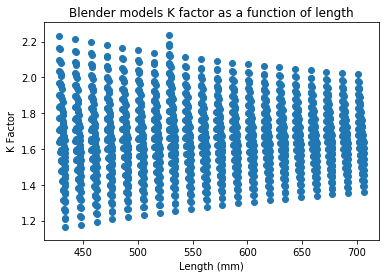

In [15]:
plt.scatter(df["2-3"], df["kfactor"])
plt.ylabel("K Factor")
plt.xlabel("Length (mm)")
plt.title("Blender models K factor as a function of length")
plt.show()

In [16]:
import cv2

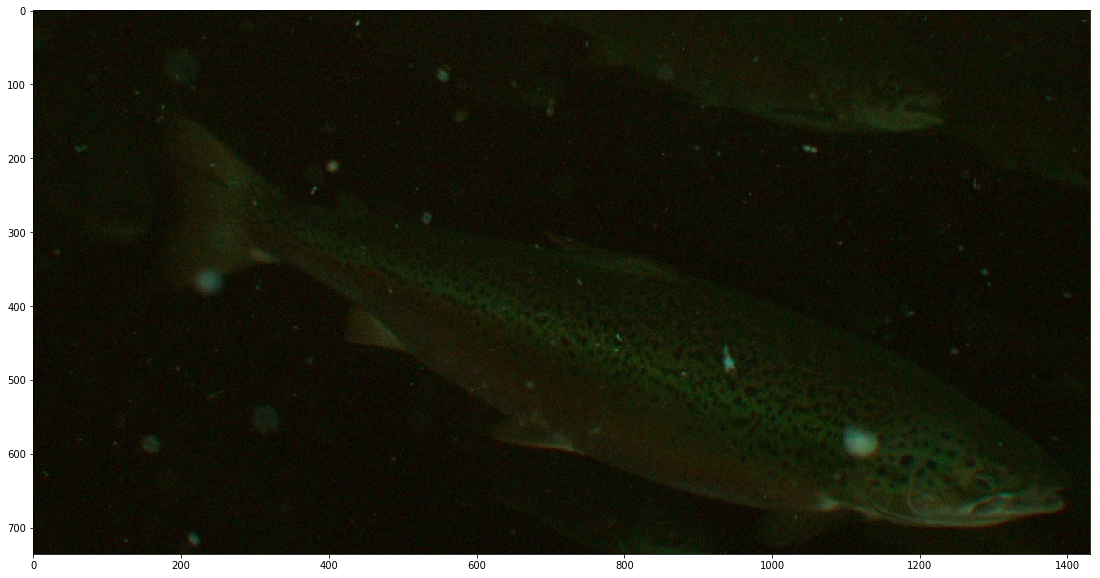

In [18]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.imread("/root/data/lice-data/crops/blom-kjeppevikholmen/2018-11-25/2/left_blom-kjeppevikholmen_2_1543143094624_1443_1235_2874_1971.jpg"))